## [A tutorial on the free-energy framework for modelling perception and learning](https://www.sciencedirect.com/science/article/pii/S0022249615000759#bbr000050)
### Rafal Bogacz


### Tutorial Exercise One

#### Useful notation and equations

1. Size of a food particle: *v*

* Noisy estimate of light intensity: *u*

* Function relating average light intensity with size ($g$): $g(v) = v^2$ 

* $f(x; \mu, \Sigma)$ is the normal distribution with mean $\mu$ and standard deviation $\Sigma$.
  1. $f(x; \mu, \Sigma) = \frac{1}{\sqrt{2 \pi \Sigma}}$*$e^{-(\frac{(x-\mu)^2}{2\Sigma})}$

* Noisy sensor, when size of food is $v$, perceived light intensity is normally distributed with $\mu=g(v)$ and standard deviation $\Sigma_u$.
  1. $p(u|v) = f(u; g(v), \Sigma_u)$
  
* The animal expects the food size to be normally distributed, with mean $v_p$ and standard deviation $\Sigma_p$.
  1. $p(v) = f(v; v_p, \Sigma_p)$
    
* Bayes: $p(v|u) = \frac{p(u|v)p(v)}{p(u)}$


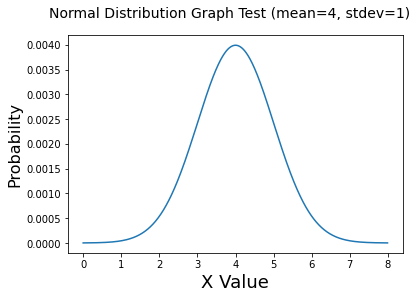

Total probability sums (should be ~1): 0.9999999999999982
Total probability weight between 3 and 5 (should be ~0.68): 0.6851485716484081
Total probability weight between 2 and 6 (should be ~0.95): 0.9550983528959243
Total probability weight between 1 and 7 (should be ~0.99): 0.9974074879968631


In [1]:
# Let's graph a normal distribution between 0 and 8 using discrete points calculated using Equation 4A
# Assume mean is 4 and standard deviation is 1

%matplotlib inline
import matplotlib.pyplot as plt
import math

def calculate_normal_probability(x, mu, sigma):
    multiplier = (2 * math.pi * sigma)**-0.5
    exp = -1 * (((x - mu)**2) / (2*sigma))
    return multiplier * math.e ** exp

# Calculate density at each point
mu = 4
sigma = 1
test_xs = [i/100 for i in range(800)]
test_ys = []
for test_x in test_xs:
    test_y = calculate_normal_probability(test_x, mu, sigma)
    test_ys.append(test_y)
# TODO - does this normalization make sense?
sum_ys = sum(test_ys)
normalized_test_ys = [test_y/sum_ys for test_y in test_ys]
   
# Plot
fig = plt.figure()
plt.plot(test_xs, normalized_test_ys)
fig.suptitle('Normal Distribution Graph Test (mean=4, stdev=1)', fontsize=14)
plt.xlabel('X Value', fontsize=18)
plt.ylabel('Probability', fontsize=16)
plt.show()

# Summary stats
total_p = sum(normalized_test_ys)
print(f'Total probability sums (should be ~1): {total_p}')
one_sigma = sum([y for x,y in zip(test_xs, normalized_test_ys) if x >= 3 and x <= 5])/total_p
print(f'Total probability weight between 3 and 5 (should be ~0.68): {one_sigma}')
two_sigma = sum([y for x,y in zip(test_xs, normalized_test_ys) if x >= 2 and x <= 6])/total_p
print(f'Total probability weight between 2 and 6 (should be ~0.95): {two_sigma}')
three_sigma = sum([y for x,y in zip(test_xs, normalized_test_ys) if x >= 1 and x <= 7])/total_p
print(f'Total probability weight between 1 and 7 (should be ~0.99): {three_sigma}')

#### Exercise 1

Assume that our animal observed the light intensity $u = 2$, the level of noise in its receptor is $\Sigma_u = 1$, and the mean and variance of its prior expectation of size are $v_p = 3$ and $\Sigma_p = 1$. Write a computer program that computes the posterior probabilities of sizes from 0.01 to 5, and plots them.

<Figure size 432x288 with 0 Axes>

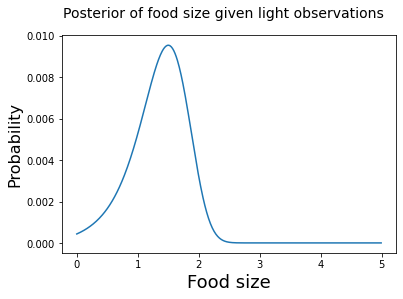

Total probability weight (should be ~1): 1.0000000000000009


In [2]:
# we are trying to calculate the probability of food size given sensed light intensity: p(v|u)
# p(v|u) = (p(u|v)*p(v))/p(u)

plt.clf()

x_points = [i/100 for i in range(500)]
y_points = []

for x_point in x_points:
    p_v = calculate_normal_probability(x_point, 3, 1)
    p_u_given_v = calculate_normal_probability(x_point, x_point**2, 1)
    y_points.append(p_v * p_u_given_v)
    
sum_y_points = sum(y_points)
normalized_y_points = [y_point/sum_y_points for y_point in y_points]

fig = plt.figure()
plt.plot(x_points, normalized_y_points)
fig.suptitle('Posterior of food size given light observations', fontsize=14)
plt.xlabel('Food size', fontsize=18)
plt.ylabel('Probability', fontsize=16)
plt.show()

print(f'Total probability weight (should be ~1): {sum(normalized_y_points)}')

#### Exercise 2

* $\phi$ is the most likely food size
* We will like for $\phi$ that maximizes $p( \phi | u)$
* $p( \phi | u) = \frac{p(u | \phi) * p(\phi)}{p(u)}$ and note that the denominator doesn't depend on $\phi$ so we can just maximize the numerator $p(u | \phi) * p(\phi)$
* Natural log is monotonic, more numerically stable, and converts multiplication to addition, so we'll use that: $ln(p(u | \phi)) + ln(p(\phi))$
* Substitute in the normal distribution density from above, rearrange and you get: $\frac{1}{2}(-ln(\Sigma_p) - \frac{(\phi - v_p)^2}{\Sigma_p} - ln(\Sigma_u) - \frac{(u - g(\phi))^2}{\Sigma_u}) + C$
* Take the derivative of the above with respect to $\phi$ and you end up with: $\frac{\delta F}{\delta \phi} = \frac{v_p - \phi}{\Sigma_p} + \frac{u - g(\phi)}{\Sigma_u} g'(\phi)$
* Note that $g(\phi) = \phi^2$ and $g'(\phi) = 2 \phi$

Write a computer program finding the most likely size of the food item $\phi$ for the situation described in Exercise 1. Initialize $\phi = v_p$, and then find its values in the next 5 time units (you can use Euler’s method, i.e. update $\phi(t + \Delta t) = \phi(t) + \Delta t \frac{\delta F}{\delta \phi}$ with $\Delta t = 0.01$).

<Figure size 432x288 with 0 Axes>

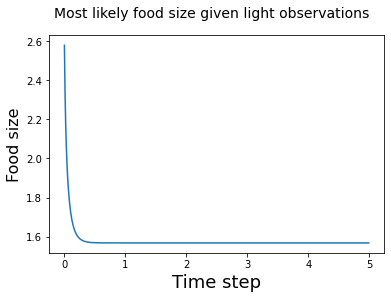

Final estimate of food size (phi): 1.567468374852423


In [3]:
timesteps = [i/100 for i in range(500)]
v_p = 3
sigma_p = 1
u = 2
sigma_u = 1

phi = v_p
phis = []

for timestep in timesteps:
    gradient = ((v_p - phi)/sigma_p) + (((u-(phi**2))/sigma_u) * 2 * phi)
    phi = phi + 0.01 * gradient
    phis.append(phi)
    
plt.clf()
fig = plt.figure()
plt.plot(timesteps, phis)
fig.suptitle('Most likely food size given light observations', fontsize=14)
plt.xlabel('Time step', fontsize=18)
plt.ylabel('Food size', fontsize=16)
plt.show()
print(f'Final estimate of food size (phi): {phis[-1]}')

<Figure size 432x288 with 0 Axes>

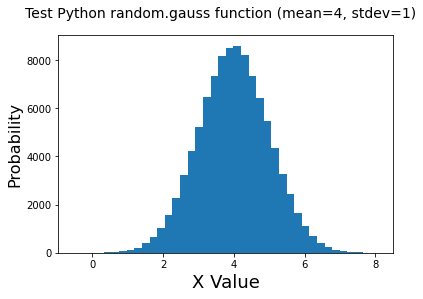

Total test values: 100000
Total probability weight between 3 and 5 (should be ~0.68): 0.68262
Total probability weight between 2 and 6 (should be ~0.95): 0.95448
Total probability weight between 1 and 7 (should be ~0.99): 0.99723


In [9]:
import random

test_vals = [random.gauss(4,1) for _ in range(100000)]
num_bins = 40

# Plot
plt.clf()
fig = plt.figure()
plt.hist(test_vals, num_bins)
fig.suptitle('Test Python random.gauss function (mean=4, stdev=1)', fontsize=14)
plt.xlabel('X Value', fontsize=18)
plt.ylabel('Probability', fontsize=16)
plt.show()

# Summary stats
total_vals = len(test_vals)
print(f'Total test values: {total_vals}')
one_sigma = len([x for x in test_vals if x >= 3 and x <= 5])/total_vals
print(f'Total probability weight between 3 and 5 (should be ~0.68): {one_sigma}')
two_sigma = len([x for x in test_vals if x >= 2 and x <= 6])/total_vals
print(f'Total probability weight between 2 and 6 (should be ~0.95): {two_sigma}')
three_sigma = len([x for x in test_vals if x >= 1 and x <= 7])/total_vals
print(f'Total probability weight between 1 and 7 (should be ~0.99): {three_sigma}')

In [ ]:
# Redo exercise 2, but assume actual food size is 1.56 but 
# we get a new noisy sensor reading at each time step sampled
# from the normal with mean 1.56**2 and stdev 1

timesteps = [i/100 for i in range(500)]
actual_v = 1.56
v_p = 3
sigma_p = 1
sigma_u = 1

phi = v_p
phis = []

for timestep in timesteps:
    sensor_reading = random.gauss(actual_v**2, sigma_u)
    gradient = ((v_p - phi)/sigma_p) + (((sensor_reading-(phi**2))/sigma_u) * 2 * phi)
    phi = phi + 0.01 * gradient
    phis.append(phi)
    
plt.clf()
fig = plt.figure()
plt.plot(timesteps, phis)
fig.suptitle('Most likely food size given light observations', fontsize=14)
plt.xlabel('Time step', fontsize=18)
plt.ylabel('Food size', fontsize=16)
plt.show()
print(f'Final estimate of food size (phi): {phis[-1]}')